In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

<h3>PCA</h3>

In [7]:
class PCA:
    
    def __init__( self , k ):
        self.k = k 
    
    def fit_transform(self , x ):
        import numpy as np
        self.x = x
        sigma = (1/len(x)) * x.T.dot(x)
        u , self.s , v = np.linalg.svd(sigma)
        
        self.principal_components = u[:,:self.k]
        
        z = x.dot(self.principal_components)
        self.z = z
        return z 
    
    def get_original(self):
        return self.z.dot(self.principal_components.T)
    
    def variance_Retained(self):
        n = 1 - (sum(self.s[:self.k])/sum(self.s))
        print(n)
        print( (1 - n)*100 , "percent variance retained" )

In [5]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [8]:
algo = PCA(k = 2)
z = algo.fit_transform(x)
algo.variance_Retained()

0.04199024638518034
95.80097536148196 percent variance retained


In [10]:
z.shape

(150, 2)

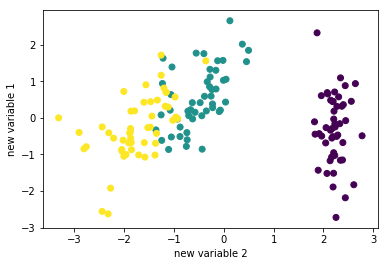

In [16]:
plt.scatter(x = z[: , :1] ,
            y = z[: , 1:] ,
            c = y )
plt.xlabel("new variable 2")
plt.ylabel("new variable 1")
plt.show()